In [1]:
####################################################################
#############                CS189 Homework 4             ##########
####################################################################

In [2]:
####################################################################
########################    Problem 1    ###########################
####################################################################

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as spy
import math
from __future__ import division
%matplotlib inline

data_path="/Users/Luba/Desktop/CS189_hw4"

In [31]:
from math import exp
from math import log as ln

In [217]:
housing_data=spy.loadmat(data_path+"/housing_dataset/housing_data.mat")

In [53]:
rang=range(len(housing_data['Xtrain']))
np.random.shuffle(rang)
random_list=rang
random_list=np.array(random_list)
sets=np.split(random_list,10)
sets_list=random_list.tolist()

In [6]:
Ytrain=housing_data['Ytrain']
Ytrain_doublelist=Ytrain.tolist()

In [8]:
lambda_list=[0.0000000000001, 0.00000000001,0.000000001,0.0000001,0.00001, 
             0.001, 0.01, 0, 1, 10, 100, 10000, 10000000000]

In [60]:
perf_list=[]
for labda in lambda_list:
    sum_RSS=[]
    for i in range(10):
        index=sets[i].tolist()
        index_rest=list(set(sets_list)-set(index))
        
        Ytrain=[]
        for i in index_rest:
            n=Ytrain_doublelist[i]
            Ytrain.append(n)
        
        Xtrain=[]
        for i in index_rest:
            l=[1]+housing_data['Xtrain'][i].tolist()
            Xtrain.append(l)
        
        Xmatrix=np.matrix(Xtrain)
        Xmatrix_tpose=np.matrix.transpose(Xmatrix)
        XXt=np.dot(Xmatrix_tpose, Xmatrix)
        iden=np.identity(9)
        lambda_iden=np.multiply(iden, labda)
        added_mat=np.add(XXt,lambda_iden)
        added_mat_inverse=np.linalg.inv(added_mat)
        added_mat_inverse_Xt=np.dot(added_mat_inverse, Xmatrix_tpose)
        Ytrain=np.matrix(Ytrain)
        Wt_tpose=np.dot(added_mat_inverse_Xt, Ytrain)
        
        CV_Ytrain=[]
        for i in index:
            n=Ytrain_doublelist[i]
            CV_Ytrain.append(n)
        
        CV_Xtrain=[]
        for i in index:
            l=[1]+housing_data['Xtrain'][i].tolist()
            CV_Xtrain.append(l)
        
        CV_Xtrain_matrix=np.matrix(CV_Xtrain)
        Pred_CV_Ytrain=np.dot(CV_Xtrain_matrix, Wt_tpose)
        
        CV_Ytrain_matrix=np.matrix(CV_Ytrain)
        
        Residuals_CV=Pred_CV_Ytrain-CV_Ytrain_matrix
        Res_dlist=Residuals_CV.tolist()
        Res_list=[]
        for i in Res_dlist:
            Res_list.append(i[0])
        Residual_squared_list=[i**2 for i in Res_list]
        RSS=sum(Residual_squared_list)
        sum_RSS.append(RSS)
    #print(len(sum_RSS))
    perf_list.append(sum(sum_RSS)/len(sum_RSS))

In [10]:
print(len(perf_list))
print(perf_list)
print(perf_list.index(min(perf_list)))

13
[9425932192568.965, 9425932192570.625, 9425932192564.664, 9425932192130.264, 9425932148779.55, 9425929158508.094, 9426021825605.748, 9425932192568.965, 9778117572765.014, 10637064485023.191, 10873576099529.188, 11268941002194.191, 52727234240929.43]
5


In [11]:
labda=lambda_list[perf_list.index(min(perf_list))]
print(labda)

0.001


In [12]:
len(sets_list)

19440

In [13]:
labda=0.001
Ytrain=[]
for i in sets_list:
    n=Ytrain_doublelist[i]
    Ytrain.append(n)
Xtrain=[]
for i in sets_list:
    l=[1]+housing_data['Xtrain'][i].tolist()
    Xtrain.append(l)

Xmatrix=np.matrix(Xtrain)
Xmatrix_tpose=np.matrix.transpose(Xmatrix)
XXt=np.dot(Xmatrix_tpose, Xmatrix)
iden=np.identity(9)
lambda_iden=np.multiply(iden, labda)
added_mat=np.add(XXt,lambda_iden)
added_mat_inverse=np.linalg.inv(added_mat)
added_mat_inverse_Xt=np.dot(added_mat_inverse, Xmatrix_tpose)
Ytrain=np.matrix(Ytrain)
Wt_tpose=np.dot(added_mat_inverse_Xt, Ytrain)

In [14]:
Wt_tpose

matrix([[ -3.56379711e+06],
        [  4.05925065e+04],
        [  1.19614698e+03],
        [ -8.50733992e+00],
        [  1.18322945e+02],
        [ -3.77917554e+01],
        [  4.31292784e+01],
        [ -4.21502624e+04],
        [ -4.24227138e+04]])

In [15]:
Yvalid=housing_data['Yvalidate']
Yvalid=Yvalid.tolist()

In [16]:
len(Yvalid)

1200

In [17]:
Xvalid=[]
for i in range(1200):
    l=[1]+housing_data['Xvalidate'][i].tolist()
    Xvalid.append(l)

In [18]:
Xvalid_matrix=np.matrix(Xvalid)

In [19]:
Xvalid_matrix
Wt_tpose.shape

(9, 1)

In [43]:
Wt_tpose

matrix([[ -3.56379711e+06],
        [  4.05925065e+04],
        [  1.19614698e+03],
        [ -8.50733992e+00],
        [  1.18322945e+02],
        [ -3.77917554e+01],
        [  4.31292784e+01],
        [ -4.21502624e+04],
        [ -4.24227138e+04]])

In [20]:
Pred_Yvalid=np.dot(Xvalid_matrix, Wt_tpose)

In [21]:
Yvalid_matrix=np.matrix(Yvalid)

In [22]:
Residuals_valid=Pred_Yvalid-Yvalid_matrix

In [23]:
Res_dlist=Residuals_valid.tolist()

In [24]:
Res_list=[]
for i in Res_dlist:
    Res_list.append(i[0])

In [25]:
Residual_squared_list=[i**2 for i in Res_list]

In [26]:
RSS=sum(Residual_squared_list)

In [32]:
RSS

5795160837838.72

In [37]:
W_9list=[i[0] for i in Wt_tpose.tolist()]
W_list=W_9list[1:]

#### index=[1,2,3,4,5,6,7,8]

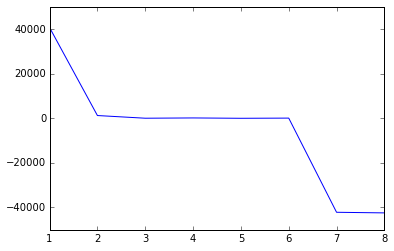

In [40]:
plt.figure()
plt.plot(index, W_list)

In [177]:
####################################################################
########################    Problem 2    ###########################
####################################################################

In [178]:
##########  Part 2.1. (a). ##########

In [24]:
import numpy as np
from math import exp
from math import log as ln
def logistic_function(x):
    return 1/(1+exp(-x))

In [180]:
Part_a_answer=-1*(ln(logistic_function(3))
                  +ln(logistic_function(1))
                  +ln(1-logistic_function(1))
                  +ln(1-logistic_function(-1)))

In [181]:
R_w0=Part_a_answer

In [183]:
Part_a_answer

1.9883724141284103

In [184]:
##########  Part 2.1. (b). ##########

In [185]:
Part_b_answer = [logistic_function(3), 
                 logistic_function(1), 
                 logistic_function(1), 
                 logistic_function(-1)]

In [186]:
u0=Part_b_answer

In [187]:
Part_b_answer

[0.9525741268224334,
 0.7310585786300049,
 0.7310585786300049,
 0.2689414213699951]

In [188]:
##########  Part 2.1. (c). ##########

In [189]:
w0=np.array([-2, 1, 0])

In [190]:
ans_c = np.add(w0, np.multiply((1-logistic_function(3)) ,[0,3,1]))

In [191]:
ans_c = np.add(ans_c, np.multiply((1-logistic_function(1)) ,[1,3,1]))

In [192]:
ans_c = np.add(ans_c, np.multiply((-logistic_function(1)) ,[0,1,1]))

In [193]:
Part_c_answer = np.add(ans_c, np.multiply((-logistic_function(-1)) ,[1,1,1]))

In [194]:
w1=Part_c_answer

In [195]:
Part_c_answer

array([-2.        ,  0.94910188, -0.68363271])

In [196]:
##########  Part 2.1. (d). ##########

In [197]:
Part_d_answer=-1*(ln(logistic_function(np.dot(w1, np.array([0,3,1]))))
                  +ln(logistic_function(np.dot(w1, np.array([1,3,1]))))
                  +ln(1-logistic_function(np.dot(w1, np.array([0,1,1]))))
                  +ln(1-logistic_function(np.dot(w1, np.array([1,1,1])))))

In [198]:
R_w1=Part_d_answer

In [199]:
Part_d_answer

1.7206170956213047

In [200]:
##########  Part 2.1. (e). ##########

In [201]:
Part_e_answer = [logistic_function(np.dot(w1, np.array([0,3,1]))), 
                 logistic_function(np.dot(w1, np.array([1,3,1]))), 
                 logistic_function(np.dot(w1, np.array([0,1,1]))), 
                 logistic_function(np.dot(w1, np.array([1,1,1])))]

In [202]:
u1=Part_e_answer

In [203]:
Part_e_answer

[0.8969395672187137,
 0.5408271344289196,
 0.5659802584910808,
 0.15000895500136596]

In [204]:
##########  Part 2.1. (f). ##########

In [205]:
ans_f = np.add(w1, 
       np.multiply((1-logistic_function(np.dot(w1, np.array([0,3,1])))) ,[0,3,1]))

In [206]:
ans_f = np.add(ans_f, 
       np.multiply((1-logistic_function(np.dot(w1, np.array([1,3,1])))) ,[1,3,1]))

In [207]:
ans_f = np.add(ans_f, 
       np.multiply((-logistic_function(np.dot(w1, np.array([0,1,1])))) ,[0,1,1]))

In [208]:
ans_f = np.add(ans_f, 
       np.multiply((-logistic_function(np.dot(w1, np.array([1,1,1])))) ,[1,1,1]))

In [209]:
w2=ans_f

In [210]:
ans_f

array([-1.69083609,  1.91981257, -0.83738862])

In [211]:
##########  Part 2.1. (g). ##########

In [212]:
Part_g_answer=-1*(ln(logistic_function(np.dot(w2, np.array([0,3,1]))))
                  +ln(logistic_function(np.dot(w2, np.array([1,3,1]))))
                  +ln(1-logistic_function(np.dot(w2, np.array([0,1,1]))))
                  +ln(1-logistic_function(np.dot(w2, np.array([1,1,1])))))

In [213]:
R_w2=Part_g_answer

In [214]:
Part_g_answer

1.854699784792251

In [5]:
########################################################
#################  PROBLEM 3 ###########################
########################################################

In [6]:
spam_data=spy.loadmat(data_path+"/spam_dataset/spam_data.mat")

In [7]:
spam_xtrain=spam_data["training_data"]

In [8]:
spam_ytrain=spam_data["training_labels"]

In [9]:
big_X=np.matrix(spam_xtrain)

In [10]:
########################################################
# Preprocessing in 3 different ways starts below
########################################################

In [12]:
from sklearn.preprocessing import normalize as normal
# 1st type normalization data
normal_1=normal(big_X)

/Users/Luba/anaconda/lib/python2.7/site-packages/sklearn/utils/extmath.py:71: DeprecationWarning: Implicitly casting between incompatible kinds. In a future numpy release, this will raise an error. Use casting="unsafe" if this is intentional.
  np.sqrt(norms, norms)


In [13]:
def log_nor(x):
    return math.log(x+0.1)

In [14]:
def indic(x):
    if x>0:
        return 1
    else:
        return 0

In [15]:
vec1=np.vectorize(log_nor)

In [279]:
# 2nd type normalization data
normal_2=vec1(big_X)

In [283]:
vec2=np.vectorize(indic)

In [284]:
# 3rd type normalization data
normal_3=vec2(big_X)

In [302]:
print(normal_3.shape[0])
print(normal_3.shape[1])

5172
32


In [1061]:
########################################################
#################  PROBLEM 3 - Part 1 ##################
########################################################

In [1062]:
def logistic_function(x):
    if(x<-709):
        x=-709
    return 1/(1+exp(-x))

In [1063]:
feature_weights=np.zeros(normal_3.shape[1])

In [1064]:
spam_ytrain_doublelist=(np.array(spam_ytrain)).tolist()
spam_ytrain_list=[]
for i in range(normal_3.shape[0]):
    n=spam_ytrain_doublelist[0][i]
    spam_ytrain_list.append(n)


In [29]:
def total_risk(feature_weights, normal):
    total_risk=0
    for i in range(normal_3.shape[0]):
        total_risk=total_risk+(spam_ytrain_list[i]*ln(logistic_function(np.dot(feature_weights,
            np.squeeze(np.asarray(normal[i])))))+(1-spam_ytrain_list[i]*math.log(1-logistic_function(np.dot(feature_weights, 
            np.squeeze(np.asarray(normal[i])))))))
    total_risk = (total_risk*(-1))/normal_3.shape[0]
    return total_risk

In [1066]:
feature_weights=np.zeros(normal_3.shape[1])
batch_number_of_iter_1=[]
batch_risk_1=[]
for j in range(1000):
    grad_sum = np.zeros(normal_3.shape[1])
    for i in range(normal_3.shape[0]):
        grad_sum = grad_sum + np.multiply((spam_ytrain_list[i]-logistic_function(np.dot(feature_weights,
                    np.squeeze(np.asarray(normal_1[i]))))), np.squeeze(np.asarray(normal_1[i])))
    feature_weights=np.add(feature_weights, np.multiply(0.0001, grad_sum))
                                    
    batch_number_of_iter_1.append(j+1)
    batch_risk_1.append(total_risk(feature_weights, normal_1))

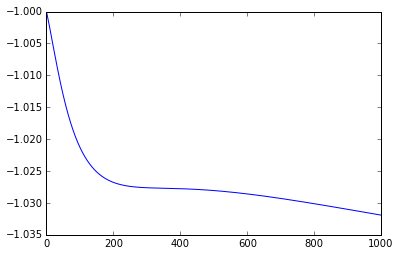

In [1067]:
#The cross-entropy risk of the training set vs the number of iterations.
plt.plot(batch_number_of_iter_1, batch_risk_1)

In [1068]:
feature_weights=np.zeros(normal_3.shape[1])
batch_number_of_iter_2=[]
batch_risk_2=[]
for j in range(1000):
    grad_sum = np.zeros(normal_3.shape[1])
    for i in range(normal_3.shape[0]):
        grad_sum = grad_sum + np.multiply((spam_ytrain_list[i]-logistic_function(np.dot(feature_weights,
                    np.squeeze(np.asarray(normal_2[i]))))), np.squeeze(np.asarray(normal_2[i])))
    feature_weights=np.add(feature_weights, np.multiply(0.000007, grad_sum))
                                    
    batch_number_of_iter_2.append(j+1)
    batch_risk_2.append(total_risk(feature_weights, normal_2))

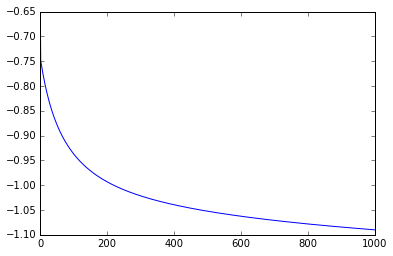

In [1069]:
#The cross-entropy risk of the training set vs the number of iterations.
plt.plot(batch_number_of_iter_2, batch_risk_2)

In [1070]:
feature_weights=np.zeros(normal_3.shape[1])
batch_number_of_iter_3=[]
batch_risk_3=[]
for j in range(1000):
    grad_sum = np.zeros(normal_3.shape[1])
    for i in range(normal_3.shape[0]):
        grad_sum = grad_sum + np.multiply((spam_ytrain_list[i]-logistic_function(np.dot(feature_weights,
                    np.squeeze(np.asarray(normal_3[i]))))), np.squeeze(np.asarray(normal_3[i])))
    feature_weights=np.add(feature_weights, np.multiply(0.0002, grad_sum))
                                    
    batch_number_of_iter_3.append(j+1)
    batch_risk_3.append(total_risk(feature_weights, normal_3))

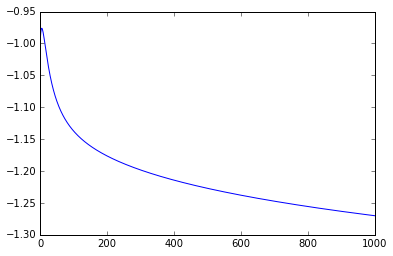

In [1071]:
#The cross-entropy risk of the training set vs the number of iterations.
plt.plot(batch_number_of_iter_3, batch_risk_3)

In [371]:
#############################################
###############  PART 2 #####################
#############################################

In [1072]:
feature_weights=np.zeros(normal_3.shape[1])
stoch_number_of_iter_1=[]
stoch_risk_1=[]
random_range=range(normal_3.shape[0])
random.shuffle(random_range)
counter=0
for i in random_range:
    counter+=1
    feature_weights=np.add(feature_weights, np.multiply(0.001, np.multiply((spam_ytrain_list[i]-
                    logistic_function(np.dot(feature_weights, np.squeeze(np.asarray(normal_1[i]))))), 
                    np.squeeze(np.asarray(normal_1[i])))))                  
    stoch_number_of_iter_1.append(counter)
    stoch_risk_1.append(total_risk(feature_weights, normal_1))

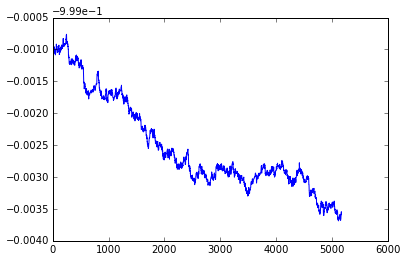

In [1073]:
#The cross-entropy risk of the training set vs the number of iterations.
plt.plot(stoch_number_of_iter_1, stoch_risk_1)

In [1129]:
feature_weights=np.zeros(normal_3.shape[1])
stoch_number_of_iter_2=[]
stoch_risk_2=[]
random_range=range(normal_3.shape[0])
random.shuffle(random_range)
counter=0
for i in random_range:
    counter+=1
    feature_weights=np.add(feature_weights, np.multiply(0.0005, 
                    np.multiply((spam_ytrain_list[i]-logistic_function(np.dot(feature_weights,
                    np.squeeze(np.asarray(normal_2[i]))))), np.squeeze(np.asarray(normal_2[i])))))                  
    stoch_number_of_iter_2.append(counter)
    stoch_risk_2.append(total_risk(feature_weights, normal_2))

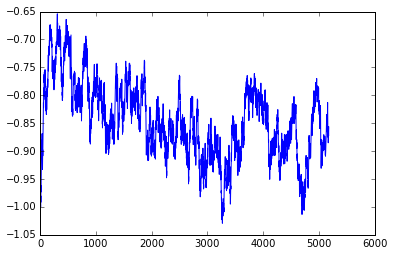

In [1130]:
#The cross-entropy risk of the training set vs the number of iterations.
plt.plot(stoch_number_of_iter_2, stoch_risk_2)

In [1085]:
feature_weights=np.zeros(normal_3.shape[1])
stoch_number_of_iter_3=[]
stoch_risk_3=[]
random_range=range(normal_3.shape[0])
random.shuffle(random_range)
counter=0
for i in random_range:
    counter+=1
    feature_weights=np.add(feature_weights, np.multiply(0.1, 
                    np.multiply((spam_ytrain_list[i]-logistic_function(np.dot(feature_weights, 
                    np.squeeze(np.asarray(normal_3[i]))))), np.squeeze(np.asarray(normal_3[i])))))                  
    stoch_number_of_iter_3.append(counter)
    stoch_risk_3.append(total_risk(feature_weights, normal_3))

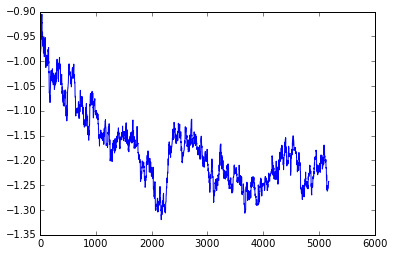

In [1086]:
#The cross-entropy risk of the training set vs the number of iterations.
plt.plot(stoch_number_of_iter_3, stoch_risk_3)

In [443]:
#############################################
###############  PART 3 #####################
#############################################

In [445]:
feature_weights=np.zeros(normal_3.shape[1])
stoch2_number_of_iter_1=[]
stoch2_risk_1=[]
random_range=range(normal_3.shape[0])
random.shuffle(random_range)
counter=0
for i in random_range:
    counter+=1
    feature_weights=np.add(feature_weights, np.multiply(1/counter, 
                    np.multiply((spam_ytrain_list[i]- logistic_function(np.dot(feature_weights,
                    np.squeeze(np.asarray(normal_1[i]))))), np.squeeze(np.asarray(normal_1[i])))))                  
    stoch2_number_of_iter_1.append(counter)
    stoch2_risk_1.append(total_risk(feature_weights, normal_1))

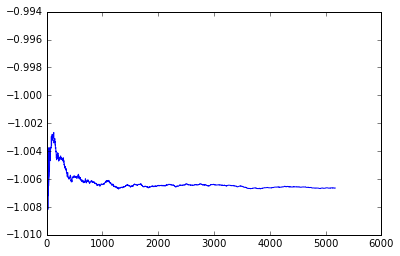

In [446]:
#The cross-entropy risk of the training set vs the number of iterations.
plt.plot(stoch2_number_of_iter_1, stoch2_risk_1)

In [447]:
feature_weights=np.zeros(normal_3.shape[1])
stoch2_number_of_iter_2=[]
stoch2_risk_2=[]
random_range=range(normal_3.shape[0])
random.shuffle(random_range)
counter=0
for i in random_range:
    counter+=1
    feature_weights=np.add(feature_weights, np.multiply(1/counter, 
                    np.multiply((spam_ytrain_list[i]-logistic_function(np.dot(feature_weights,
                    np.squeeze(np.asarray(normal_2[i]))))), np.squeeze(np.asarray(normal_2[i])))))                  
    stoch2_number_of_iter_2.append(counter)
    stoch2_risk_2.append(total_risk(feature_weights, normal_2))

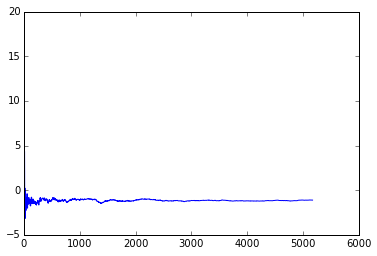

In [448]:
#The cross-entropy risk of the training set vs the number of iterations.
plt.plot(stoch2_number_of_iter_2, stoch2_risk_2)

In [451]:
feature_weights=np.zeros(normal_3.shape[1])
stoch2_number_of_iter_3=[]
stoch2_risk_3=[]
random_range=range(normal_3.shape[0])
random.shuffle(random_range)
counter=0
for i in random_range:
    counter+=1
    feature_weights=np.add(feature_weights, np.multiply(1/counter, 
            np.multiply((spam_ytrain_list[i]-logistic_function(np.dot(feature_weights,
                np.squeeze(np.asarray(normal_3[i]))))), np.squeeze(np.asarray(normal_3[i])))))                  
    stoch2_number_of_iter_3.append(counter)
    stoch2_risk_3.append(total_risk(feature_weights, normal_3))

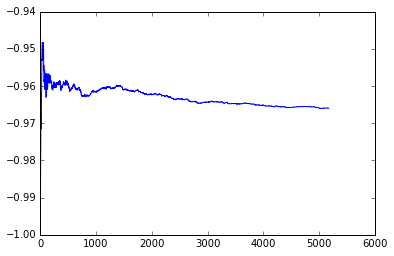

In [452]:
#The cross-entropy risk of the training set vs the number of iterations.
plt.plot(stoch2_number_of_iter_3, stoch2_risk_3)

In [879]:
#############################################
###############  PART 3.4 ###################
#############################################

In [880]:
##########  Part 3.4 (a). ##########

In [881]:
from random import shuffle

In [918]:
number_of_emails=normal_3.shape[0]

In [919]:
random_shuffle=range(number_of_emails)
shuffle(random_shuffle)

In [920]:
training_indices=random_shuffle[0:int(number_of_emails*(2/3))]
valid_indices=random_shuffle[int(number_of_emails*(2/3)):]

In [921]:
kernel_ytrain_list=[spam_ytrain_list[i] for i in training_indices]
kernel_yvalid_list=[spam_ytrain_list[i] for i in valid_indices]

In [1018]:
normal_kernel=vec1(big_X)

In [1019]:
t_list=[list(normal_kernel[i]) for i in training_indices]

In [1020]:
t_list_np=np.array(t_list)

In [1021]:
v_list=[list(normal_kernel[i]) for i in valid_indices]

In [1022]:
v_list_np=np.array(v_list)

In [1023]:
kernel_big_X=np.matrix(t_list_np)

In [1025]:
kernel_v_big_X=np.matrix(v_list_np)

In [1027]:
r_lambda = 0.001
#step_size = 0.001

In [1028]:
k_matrix=[]
for i in range(kernel_big_X.shape[0]):
    sub_list=[]
    for j in range(kernel_big_X.shape[0]):
        sub_list.append(np.square(np.dot(kernel_big_X[i], kernel_big_X[j].T).item()+1))
    k_matrix.append(sub_list)    

    

In [1029]:
kernel_big_X.shape

(3448, 32)

In [1030]:
kernel_tmatrix = np.matrix(k_matrix)

In [1032]:
kv_matrix=[]
for i in range(kernel_v_big_X.shape[0]):
    sub_list=[]
    for j in range(kernel_v_big_X.shape[0]):
        sub_list.append(np.square(np.dot(kernel_v_big_X[i], kernel_v_big_X[j].T).item()+1))
    kv_matrix.append(sub_list)  

In [1034]:
kernel_vmatrix = np.matrix(kv_matrix)

In [1158]:
##### processing data finishes above.

In [1035]:
#First two inputs are numpy arrays with same number of elements 
def poly_kernal_deg2(x,z, p):
    return np.square(np.dot(x.T, z) + p)
    

In [1036]:
# vector "a" dot product with kernel values 
def sum_weighted_kernels(a, data_matrix, x):
    row_num=data_matrix.shape[0]
    k_list=[]
    for i in range(row_num):
        k_list.append(poly_kernal_deg2(np.squeeze(np.asarray(data_matrix[i])), x, 1))
    np_k_list=np.array(k_list)    
    return np.dot(np_k_list, a)

In [1037]:
def point_risk(a_vector, data_matrix, z, i):
    total_risk=0
    x=(logistic_function(sum_weighted_kernels(a_vector, 
                data_matrix, np.squeeze(np.asarray(z)))))
    if(x<=0):
        x=1E-10
    y=(1-logistic_function(sum_weighted_kernels(a_vector, 
                data_matrix, np.squeeze(np.asarray(z)))))
    if(y<=0):
        y=1E-10
    risk=(kernel_ytrain_list[i]*math.log(x)+
                    (1-kernel_ytrain_list[i]*math.log(y)))
    risk = (risk*(-1))#/data_matrix.shape[0]
    return risk

In [1039]:
print(len(training_indices))
print(len(valid_indices))

3448
1724


In [1078]:
a_vector=np.zeros(kernel_tmatrix.shape[0])
counter=0
k_total_risk=[]
number_iter_kernel=[]
total_point_risk=0
for i in training_indices:
    step_size=1/(counter+1)
    #if counter%100==0:
    #    print(counter)
    Ka_i=np.asarray(np.dot(kernel_tmatrix, a_vector))[0][counter]
    #print(Ka_i)
    if(Ka_i<-709):
        Ka_i=-709
    val=a_vector[counter]-r_lambda*step_size*a_vector[counter]+step_size*(kernel_ytrain_list[counter]-logistic_function(Ka_i)) 
    np.put(a_vector, counter, val)
    for j in range(kernel_tmatrix.shape[0]):
        if(j!=i):
            val_h=a_vector[j] - r_lambda*step_size*a_vector[j]
            np.put(a_vector, j, val_h)
    total_point_risk=total_point_risk+point_risk(a_vector, 
                        kernel_tmatrix, kernel_tmatrix[counter], counter)
    
    counter+=1
    k_total_risk.append(total_point_risk/counter)

    number_iter_kernel.append(counter)
        

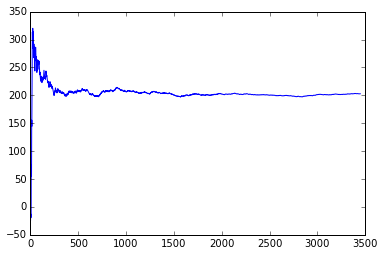

In [1041]:
plt.plot(number_iter_kernel, k_total_risk)

In [1042]:
##########  the validation part starts here ##########

In [1079]:
counter=0
kv_total_risk=[]
number_iter_kernel_v=[]
total_point_risk=0
for i in valid_indices:
    step_size=1/(counter+1)
    #if counter%100==0:
    #    print(counter)
    Ka_i=np.asarray(np.dot(kernel_tmatrix, a_vector))[0][counter]
    #print(Ka_i)
    if(Ka_i<-709):
        Ka_i=-709
    val=a_vector[counter] - r_lambda*step_size*a_vector[counter]+step_size*(kernel_ytrain_list[counter]-logistic_function(Ka_i)) 
    np.put(a_vector, counter, val)
    for j in range(kernel_tmatrix.shape[0]):
        if(j!=i):
            val_h=a_vector[j] - r_lambda*step_size*a_vector[j]
            np.put(a_vector, j, val_h)
    total_point_risk=total_point_risk+point_risk(a_vector, 
                kernel_big_X, kernel_v_big_X[counter].T, counter)
    
    counter+=1
    kv_total_risk.append(total_point_risk/counter)

    number_iter_kernel_v.append(counter)


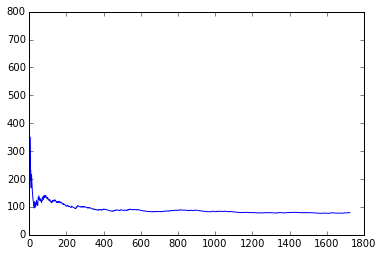

In [1044]:
plt.plot(number_iter_kernel_v, kv_total_risk)

In [1045]:
##########  Part 3.4 (b). ##########

In [1046]:
#First two inputs are numpy arrays with same number of elements 
def lin_kernel(x,z, p):
    return np.dot(x.T, z) + p

In [1047]:
# vector "a" dot product with kernel values 
def sum_weighted_lin_kernels(a, data_matrix, x):
    row_num=data_matrix.shape[0]
    k_list=[]
    for i in range(row_num):
        k_list.append(lin_kernal(np.squeeze(np.asarray(data_matrix[i])), x, 1))
    np_k_list=np.array(k_list)    
    return np.dot(np_k_list, a)

In [1048]:
def lin_point_risk(a_vector, data_matrix, z, i):
    total_risk=0
    
    x=(logistic_function(sum_weighted_lin_kernels(a_vector, 
                data_matrix, np.squeeze(np.asarray(z)))))
    if(x<=0):
        x=1E-10
    y=(1-logistic_function(sum_weighted_lin_kernels(a_vector, 
                data_matrix, np.squeeze(np.asarray(z)))))
    if(y<=0):
        y=1E-10
        
    risk=(kernel_ytrain_list[i]*math.log(x)+
                    (1-kernel_ytrain_list[i]*math.log(y)))
    risk = (risk*(-1))
    return risk

In [1080]:
a_vector_lin=np.zeros(kernel_tmatrix.shape[0])
counter=0
lin_k_total_risk=[]
number_iter_lin_kernel=[]
total_point_risk=0
for i in training_indices:
    step_size=1/(counter+1)
    #if counter%100==0:
    #    print(counter)
    Ka_i=np.asarray(np.dot(kernel_tmatrix, a_vector_lin))[0][counter]
    #print(Ka_i)
    if(Ka_i<-709):
        Ka_i=-709
    val=a_vector_lin[counter] - r_lambda*step_size*a_vector_lin[counter]+ 
                    step_size*(kernel_ytrain_list[counter] - logistic_function(Ka_i)) 
    np.put(a_vector_lin, counter, val)
    for j in range(kernel_tmatrix.shape[0]):
        if(j!=i):
            val_h=a_vector_lin[j] - r_lambda*step_size*a_vector_lin[j]
            np.put(a_vector_lin, j, val_h)
    total_point_risk=total_point_risk+lin_point_risk(a_vector_lin,
                        kernel_tmatrix, kernel_tmatrix[counter], counter)
    
    counter+=1
    lin_k_total_risk.append(total_point_risk/counter)

    number_iter_lin_kernel.append(counter)

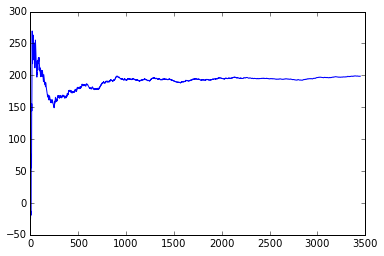

In [1051]:
plt.plot(number_iter_lin_kernel, lin_k_total_risk)

In [1052]:
#a_vector_lin=np.zeros(kernel_tmatrix.shape[0])
counter=0
lin_kv_total_risk=[]
number_iter_lin_kernel_v=[]
total_point_risk=0
for i in valid_indices:
    step_size=1/(counter+1)
    #if counter%100==0:
    #    print(counter)
    Ka_i=np.asarray(np.dot(kernel_tmatrix, a_vector_lin))[0][counter]
    #print(Ka_i)
    if(Ka_i<-709):
        Ka_i=-709
    val=a_vector_lin[counter] - r_lambda*step_size*a_vector_lin[counter] + 
                    step_size*(kernel_ytrain_list[counter]-logistic_function(Ka_i)) 
    np.put(a_vector_lin, counter, val)
    for j in range(kernel_vmatrix.shape[0]):
        if(j!=i):
            val_h=a_vector_lin[j] - r_lambda*step_size*a_vector_lin[j]
            np.put(a_vector_lin, j, val_h)
    total_point_risk=total_point_risk+lin_point_risk(a_vector_lin, 
                            kernel_big_X, kernel_v_big_X[counter].T, counter)
    
    counter+=1
    lin_kv_total_risk.append(total_point_risk/counter)

    number_iter_lin_kernel_v.append(counter)

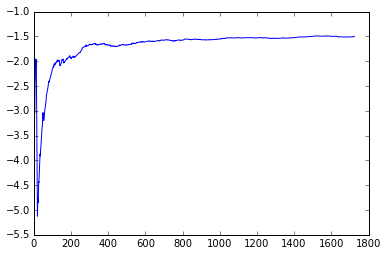

In [1053]:
plt.plot(number_iter_lin_kernel_v, lin_kv_total_risk)

In [17]:
#############################################
###############  PART 5 #####################
#############################################

In [18]:
from __future__ import division

In [19]:
spam_test_data=spam_data["test_data"]

In [20]:
spam_test_data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 3, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [21]:
test_big_X=np.matrix(spam_test_data)

In [22]:
test_big_X

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 1, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 1, 0, 0],
        [0, 0, 0, ..., 3, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [27]:
test_normal_2=vec1(test_big_X)

In [1154]:
test_feature_weights=np.zeros(normal_3.shape[1])
test_batch_number_of_iter_2=[]
test_batch_risk_2=[]
for j in range(3000):
    grad_sum = np.zeros(normal_3.shape[1])
    for i in range(normal_3.shape[0]):
        grad_sum = grad_sum + np.multiply((spam_ytrain_list[i]-logistic_function(np.dot(test_feature_weights,
                    np.squeeze(np.asarray(normal_2[i]))))), 
                    np.squeeze(np.asarray(normal_2[i])))
    test_feature_weights=np.add(test_feature_weights, np.multiply(0.000007,
                                                                grad_sum))
                                    
    test_batch_number_of_iter_2.append(j+1)
    test_batch_risk_2.append(total_risk(test_feature_weights, normal_2))

In [1131]:
def pred_func(x):
    if x<0.5:
        return 0
    elif x>0.5:
        return 1
    elif x==0.5:
        return random.randint(0, 1)

In [1156]:
result=[]
for k in range(test_normal_1.shape[0]):
    result.append(pred_func(logistic_function(np.dot(
      np.squeeze(np.asarray(test_normal_2[1])),test_feature_weights_test))))